# **1. Linear regression**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## 1.Load Data

In [2]:
df = pd.read_csv('/content/drive/MyDrive/data/Salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [3]:
X = df.Level
X

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
Name: Level, dtype: int64

In [4]:
y = df.Salary
y

0      45000
1      50000
2      60000
3      80000
4     110000
5     150000
6     200000
7     300000
8     500000
9    1000000
Name: Salary, dtype: int64

Text(0, 0.5, 'Salary')

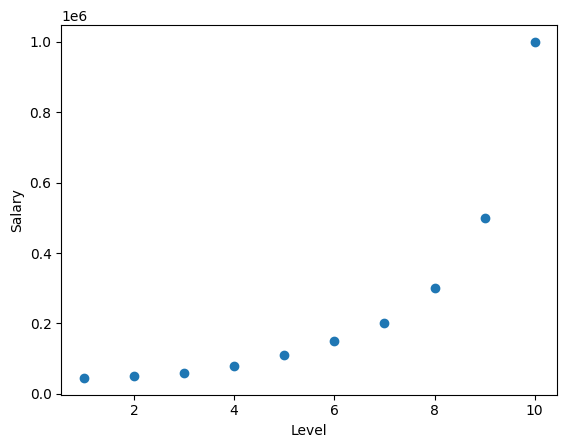

In [5]:
plt.scatter(X, y)
plt.xlabel("Level")
plt.ylabel("Salary")

## 2.Linear Regression

In [13]:
def r2score(y_pred, y):
  rss = np.sum((y_pred - y) ** 2)
  tss = np.sum((y-y.mean()) **2)

  r2 = 1 - (rss/tss)
  return r2

In [7]:
class LinearRegression:
  def __init__(self, X_data, y_target, learning_rate=0.01, num_epochs=10000):
    self.X_data = X_data # Shape: (num_samples, num_features)
    self.y_target = y_target # Shape: (num_samples,)
    self.learning_rate = learning_rate
    self.num_epochs = num_epochs
    self.num_samples = self.X_data.shape[0]

    # Initial Coefficients
    self.theta = np.random.randn(self.X_data.shape[1])
    self.losses = []

  def compute_loss(self, y_pred, y_target):
    loss = (y_pred - y_target)*(y_pred - y_target)
    loss = np.mean(loss)
    return loss

  def predict(self, X_data):
    y_pred = X_data.dot(self.theta)
    return y_pred

  def fit(self):
    for epoch in range(self.num_epochs):
      # predict
      y_pred = self.predict(self.X_data)

      # compute loss
      loss = self.compute_loss(y_pred, self.y_target)
      self.losses.append(loss)

      # compute gradient
      k = 2*(y_pred - self.y_target)
      gradients = self.X_data.T.dot(k)/self.num_samples

      # update weight
      self.theta = self.theta - self.learning_rate*gradients

      print(f'Epoch: {epoch} - Loss: {loss}')

    return {
        'loss': sum(self.losses)/len(self.losses),
        'weight': self.theta
    }

In [8]:
X_linear = X.values.reshape(-1, 1)
X_linear = np.hstack((np.ones((X_linear.shape[0], 1)), X_linear))

In [9]:
X_linear

array([[ 1.,  1.],
       [ 1.,  2.],
       [ 1.,  3.],
       [ 1.,  4.],
       [ 1.,  5.],
       [ 1.,  6.],
       [ 1.,  7.],
       [ 1.,  8.],
       [ 1.,  9.],
       [ 1., 10.]])

In [10]:
linear_model = LinearRegression(X_linear, y)
linear_model.fit()

Streaming output truncated to the last 5000 lines.
Epoch: 5000 - Loss: 26695878787.878784
Epoch: 5001 - Loss: 26695878787.87879
Epoch: 5002 - Loss: 26695878787.878784
Epoch: 5003 - Loss: 26695878787.878796
Epoch: 5004 - Loss: 26695878787.878796
Epoch: 5005 - Loss: 26695878787.878777
Epoch: 5006 - Loss: 26695878787.87879
Epoch: 5007 - Loss: 26695878787.87878
Epoch: 5008 - Loss: 26695878787.87879
Epoch: 5009 - Loss: 26695878787.878788
Epoch: 5010 - Loss: 26695878787.878788
Epoch: 5011 - Loss: 26695878787.878784
Epoch: 5012 - Loss: 26695878787.878784
Epoch: 5013 - Loss: 26695878787.878796
Epoch: 5014 - Loss: 26695878787.878784
Epoch: 5015 - Loss: 26695878787.87878
Epoch: 5016 - Loss: 26695878787.87878
Epoch: 5017 - Loss: 26695878787.878796
Epoch: 5018 - Loss: 26695878787.87879
Epoch: 5019 - Loss: 26695878787.87879
Epoch: 5020 - Loss: 26695878787.878788
Epoch: 5021 - Loss: 26695878787.87879
Epoch: 5022 - Loss: 26695878787.87879
Epoch: 5023 - Loss: 26695878787.878784
Epoch: 5024 - Loss: 266

{'loss': 26812264121.467236,
 'weight': array([-195333.33333333,   80878.78787879])}

In [11]:
y_pred = linear_model.predict(X_linear)

In [14]:
r2score(y_pred, y)

0.6690412331929895

In [15]:
linear_model.theta

array([-195333.33333333,   80878.78787879])

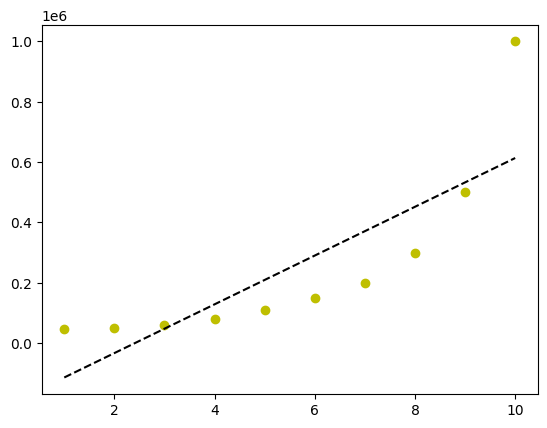

In [16]:
plt.plot(X, y, 'yo', X, linear_model.theta[1]*X + linear_model.theta[0], '--k')
plt.show()

## 3.Polymial Regression

In [18]:
def create_polynomial_feature(X, degree=2):
  """Creates the polynomial features
    Args:
        X: A array tensor for the data.
        degree: A intege for the degree of
        the generated polynomial function.
    """
  X_new = X
  for d in range(2, degree+1):
    X_new = np.c_[X_new, np.power(X,d)]
  return X_new

### 3.1.Polymial Regression with degree = 2

In [19]:
X_poly = create_polynomial_feature(X, degree=2)
X_poly

array([[  1,   1],
       [  2,   4],
       [  3,   9],
       [  4,  16],
       [  5,  25],
       [  6,  36],
       [  7,  49],
       [  8,  64],
       [  9,  81],
       [ 10, 100]])

In [20]:
X_poly = np.hstack((np.ones((X_poly.shape[0], 1)), X_poly))
X_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [21]:
poly_model = LinearRegression(X_poly, y, learning_rate=0.0001, num_epochs=10000)
poly_model.fit()

Streaming output truncated to the last 5000 lines.
Epoch: 5000 - Loss: 10675939799.556046
Epoch: 5001 - Loss: 10675819947.47647
Epoch: 5002 - Loss: 10675700121.325102
Epoch: 5003 - Loss: 10675580321.076605
Epoch: 5004 - Loss: 10675460546.705673
Epoch: 5005 - Loss: 10675340798.18703
Epoch: 5006 - Loss: 10675221075.495419
Epoch: 5007 - Loss: 10675101378.605616
Epoch: 5008 - Loss: 10674981707.49242
Epoch: 5009 - Loss: 10674862062.130663
Epoch: 5010 - Loss: 10674742442.495209
Epoch: 5011 - Loss: 10674622848.560923
Epoch: 5012 - Loss: 10674503280.30273
Epoch: 5013 - Loss: 10674383737.69556
Epoch: 5014 - Loss: 10674264220.714375
Epoch: 5015 - Loss: 10674144729.334177
Epoch: 5016 - Loss: 10674025263.52997
Epoch: 5017 - Loss: 10673905823.276806
Epoch: 5018 - Loss: 10673786408.549755
Epoch: 5019 - Loss: 10673667019.323914
Epoch: 5020 - Loss: 10673547655.574406
Epoch: 5021 - Loss: 10673428317.276388
Epoch: 5022 - Loss: 10673309004.405033
Epoch: 5023 - Loss: 10673189716.935547
Epoch: 5024 - Loss:

{'loss': 11093729471.599077,
 'weight': array([ 14601.58368276, -47838.39928596,  12584.3632739 ])}

In [22]:
y_pred = poly_model.predict(X_poly)
r2score(y_pred, y)

0.8736083096612819

In [23]:
poly_model.theta

array([ 14601.58368276, -47838.39928596,  12584.3632739 ])

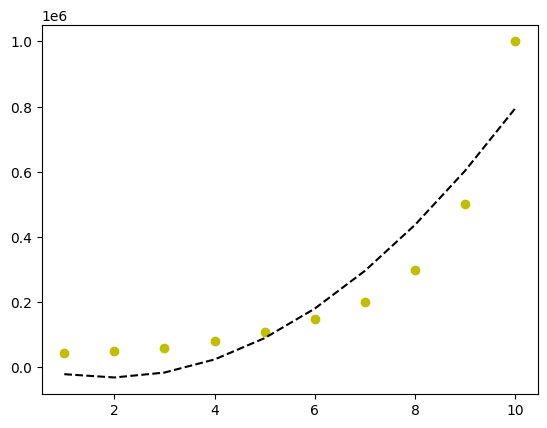

In [24]:
X_plot = df.Level
y_func = poly_model.theta[2]*X*X + poly_model.theta[1]*X + poly_model.theta[0]
plt.plot(X_plot, y, 'yo', X, y_func, '--k')
plt.show()

## 3.2.Polymial Regression with degree = 3

In [26]:
X_poly = create_polynomial_feature(X, degree=3)
X_poly

array([[   1,    1,    1],
       [   2,    4,    8],
       [   3,    9,   27],
       [   4,   16,   64],
       [   5,   25,  125],
       [   6,   36,  216],
       [   7,   49,  343],
       [   8,   64,  512],
       [   9,   81,  729],
       [  10,  100, 1000]])

In [27]:
X_poly = np.hstack((np.ones((X_poly.shape[0], 1)), X_poly))
X_poly

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [28]:
poly_model = LinearRegression(X_poly, y, learning_rate=0.0000001, num_epochs=10000)
poly_model.fit()

Streaming output truncated to the last 5000 lines.
Epoch: 5000 - Loss: 6801104369.608801
Epoch: 5001 - Loss: 6801063388.284638
Epoch: 5002 - Loss: 6801022408.148205
Epoch: 5003 - Loss: 6800981429.199476
Epoch: 5004 - Loss: 6800940451.438411
Epoch: 5005 - Loss: 6800899474.86497
Epoch: 5006 - Loss: 6800858499.479129
Epoch: 5007 - Loss: 6800817525.280849
Epoch: 5008 - Loss: 6800776552.270094
Epoch: 5009 - Loss: 6800735580.446829
Epoch: 5010 - Loss: 6800694609.81102
Epoch: 5011 - Loss: 6800653640.362628
Epoch: 5012 - Loss: 6800612672.101624
Epoch: 5013 - Loss: 6800571705.027967
Epoch: 5014 - Loss: 6800530739.14163
Epoch: 5015 - Loss: 6800489774.442568
Epoch: 5016 - Loss: 6800448810.93076
Epoch: 5017 - Loss: 6800407848.60616
Epoch: 5018 - Loss: 6800366887.46873
Epoch: 5019 - Loss: 6800325927.51844
Epoch: 5020 - Loss: 6800284968.755255
Epoch: 5021 - Loss: 6800244011.179143
Epoch: 5022 - Loss: 6800203054.790071
Epoch: 5023 - Loss: 6800162099.587993
Epoch: 5024 - Loss: 6800121145.5728855
Epoch

{'loss': 6979098273.053484,
 'weight': array([   2.30102182, -100.49861716, -535.84536735,  889.89360369])}

In [29]:
y_pred = poly_model.predict(X_poly)
r2score(y_pred, y)

0.9180491616269901

In [30]:
poly_model.theta

array([   2.30102182, -100.49861716, -535.84536735,  889.89360369])

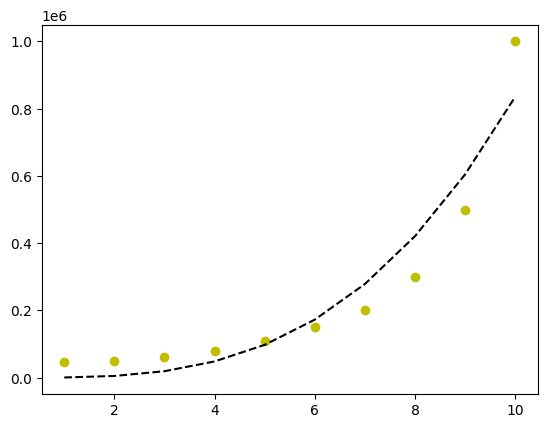

In [31]:
X_plot = df.Level
y_func = poly_model.theta[3]*X*X*X + poly_model.theta[2]*X*X + poly_model.theta[1]*X + poly_model.theta[0]
plt.plot(X_plot, y, 'yo', X, y_func, '--k')
plt.show()